# Project Proposal - Wine Quality Classification
## DSCI100 - 005 - Group 2
##### Names: Sean Dempsey, enter names

## Introduction
- Provide relevant background on topic, state predictive question, and describe dataset
- I started this - there may be too much detail - not sure if the list of variables is necessary

Wine quality and flavour is a complex topic, and results can be influenced by a multitude of external factors, including the grape variety, climatic conditions of growth, and geographic location (Basalekou et al., 2023). These qualitative factors help to influence the quantitative chemical and physical properties of the wine, such as the acidity, denisty, and sulphite concentration, among many others. In this project, we hope to use these quantitative elements to classify wines onto a ten point quality scale. To be more specific, we want to know what quantitative wine qualities, such as those mentioned above, can be used to accurately predict the quality of the wine. The dataset being used is the "Wine Quality Dataset" from Kaggle (https://www.kaggle.com/datasets/yasserh/wine-quality-dataset). The dataset focuses on a specific type of red wine called "Vinho Verde", which originates from Portugal. Considering only one region makes classification simpler, since geographic location and climate don't have to be factored in to the equation. This dataset contains over 1100 observations of different wines in the region, and the variables describe the chemical and physical properties of the wine. The dataset has many variables, and it is likely that not all will be useful for predicting the wine quality. As such, the aim of this project is to determine the best predicting variables for wine quality from this dataset.

## Preliminary Exploraty Analysis
- Read in data
- Clean and wrangle (should be already pretty clean)
- Split into training and testing (remember to set seed)
- use training data to summarize the data in **at least** one table
- Use training data to summarize the data in **at least** one plot

#### 1. Read in data and load libraries

In [2]:
library(tidyverse)
library(tidymodels)
library(janitor)
library(repr)
install.packages("corrplot")
library(corrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
options(repr.matrix.max.rows = 9)
wine_data_raw <- read_csv("https://raw.githubusercontent.com/MostLeVert/goup01dsci100/main/WineQT.csv") |>
    clean_names()
wine_data_raw

Rows: 1143 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality,id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.8,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6,1593
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5,1594
5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6,1595


#### 2. Clean and wrangle data

In [4]:
wine_data <- wine_data_raw |>
    mutate(quality = as_factor(quality))

#### 3. Split into training and testing sets

In [5]:
set.seed(25)
wine_split <- initial_split(wine_data, prop = 0.75, strata = quality) # ensure that quality values are even between sets
wine_test <- testing(wine_split)
wine_train <- training(wine_split)

#### 4. Analysis (using only training data)

In [6]:
obs_per_class <- wine_train |>
    group_by(quality) |>
    summarise(count = n())
obs_per_class # Find number of observations of each quality

quality,count
<fct>,<int>
3,5
4,22
5,367
6,345
7,108
8,9


**Table 1**

In [7]:
names(wine_train) # List of all column names to use in correlation matrix

[1] "fixed_acidity"        "volatile_acidity"     "citric_acid"         
 [4] "residual_sugar"       "chlorides"            "free_sulfur_dioxide" 
 [7] "total_sulfur_dioxide" "density"              "p_h"                 
[10] "sulphates"            "alcohol"              "quality"             
[13] "id"

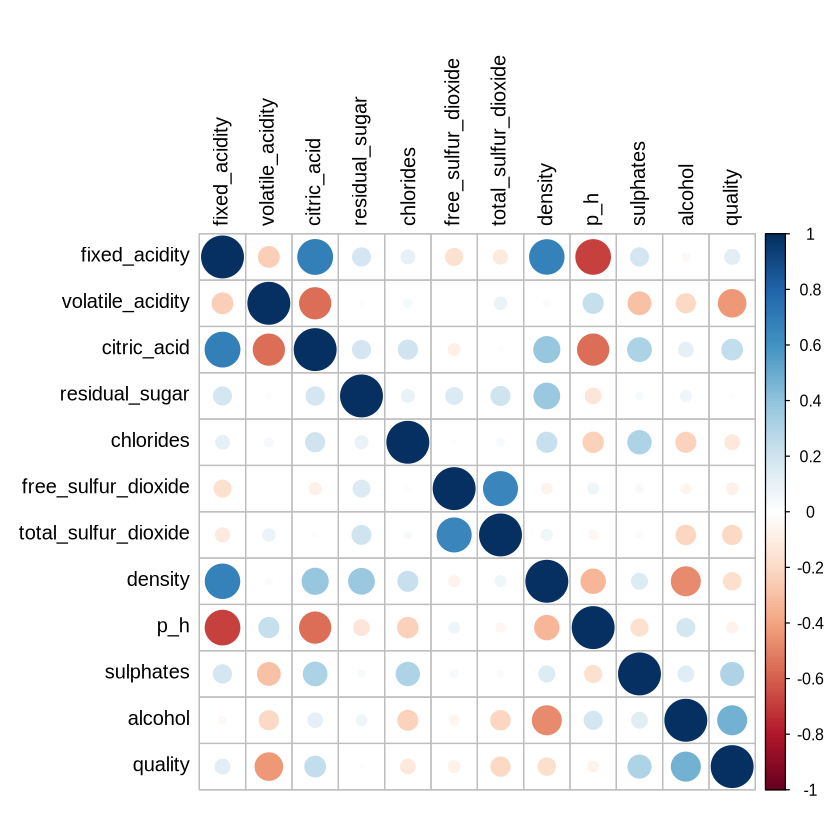

In [25]:
# Compute the correlation matrix
wine_train_quantitative <- wine_train |> 
mutate(quality = as.numeric(quality))

correlation_matrix <- cor(wine_train_quantitative[, c('fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'p_h', 'sulphates', 'alcohol', 'quality')])

# Create a correlation matrix plot to help decide which variables may be the best predictors for quality
corrplot(correlation_matrix, method = "circle", tl.col = "black")

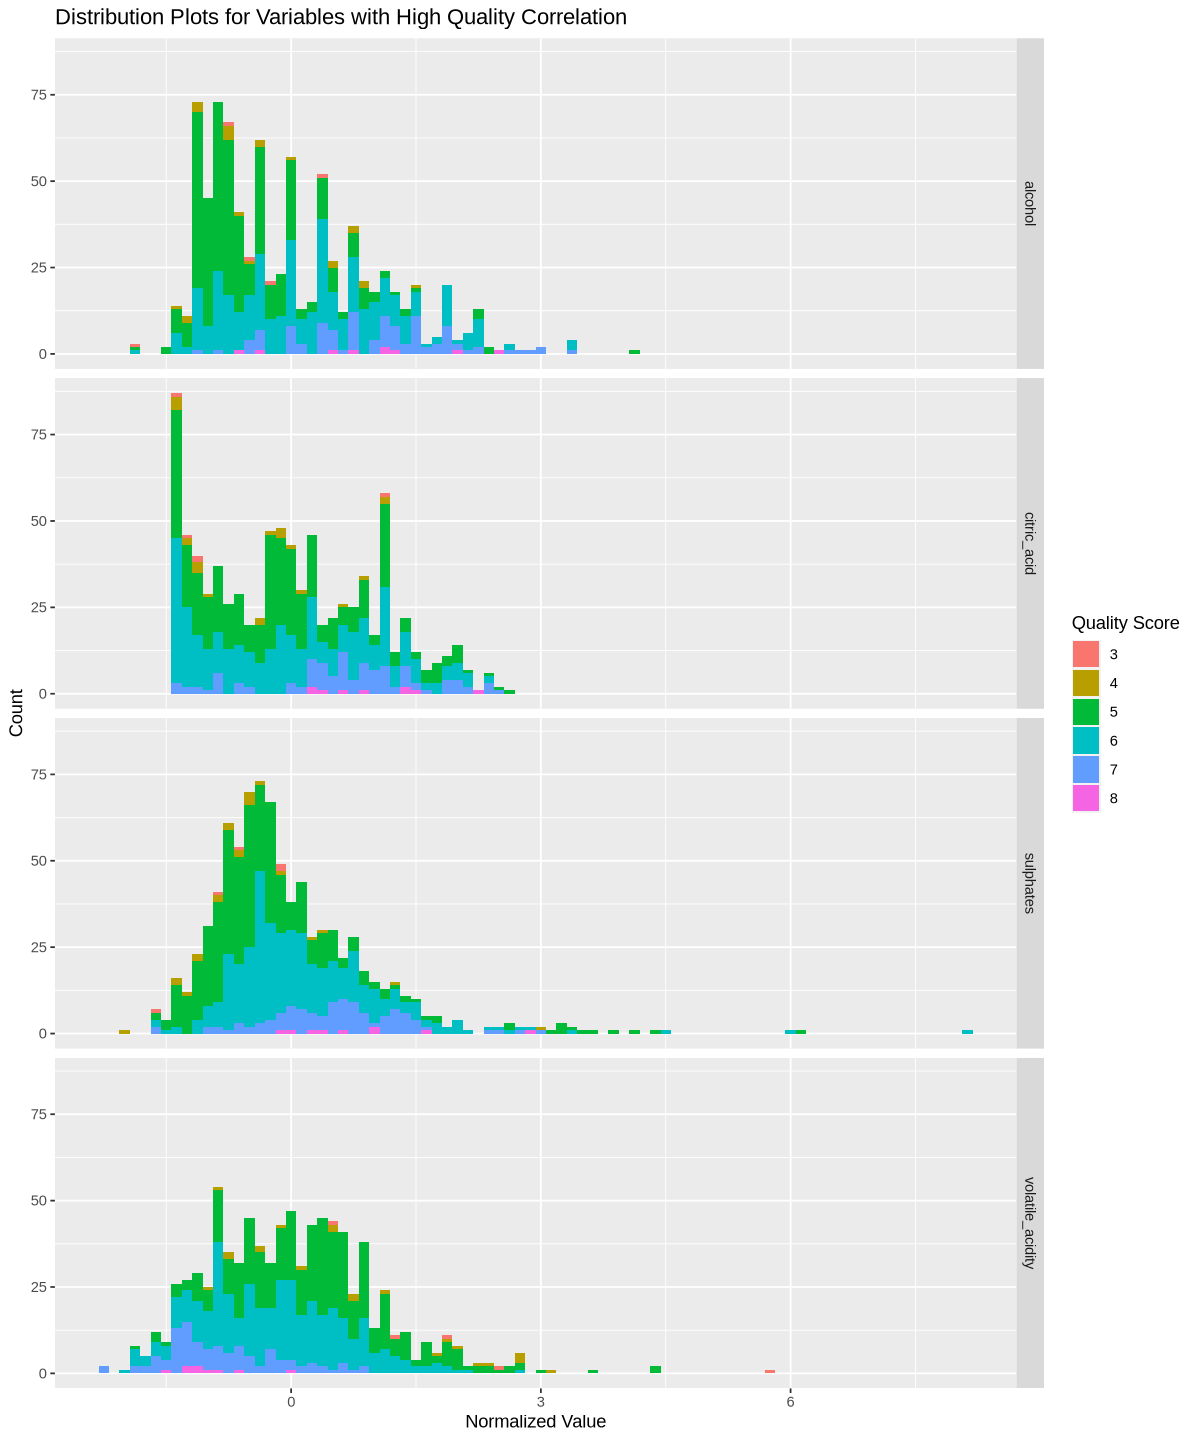

In [41]:
# Create a distribution plot for the variables with larger correlations with quality from the correlation plot above
options(repr.plot.height = 12, repr.plot.width = 10)
qual_id_df <- wine_train |>
    select(quality) # create data fram with just quality for use below
distribution_plot <- wine_train |>
    select(volatile_acidity, citric_acid, sulphates, alcohol) |>
    scale() |> #Scaling data so that axis domain is consistent across plots
    as.data.frame() |>
    bind_cols(qual_id_df) |>
    pivot_longer(cols = volatile_acidity:alcohol, names_to = "measurement", values_to = "value") |>
    ggplot(aes(x = value, fill = quality)) +
        geom_histogram(binwidth = 0.125) +
        facet_grid(rows = vars(measurement)) +
        labs(x = "Normalized Value", 
            y = "Count", 
            title = "Distribution Plots for Variables with High Quality Correlation", 
            fill = "Quality Score")
distribution_plot

## Methods
We will conduct this data analysis using a K-nearest neighbours classification algorithm. The predictor variables will be some combination of `volatile_acidity`, `sulphates`, `citric_acid`, and `alcohol`, since these variables showed the highest correlation with wine quality (see correlation matrix and distribution plots above). Table 1 shows that the number of observations of each quality is not even; many more observations of middle qualities (5, 6, and 7) are present in this dataset than the higher and lower quality wines. We will find some way to adjust our model for this class imbalance, potentially by replicating observations of the more extreme qualities. 
- Describe at least one way that you will visualize the results

## Expected Outcomes and Significance
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

## Sources
- https://www.kaggle.com/datasets/yasserh/wine-quality-dataset (dataset)
- https://www.mdpi.com/2306-5710/9/2/41 (for intro)